# 03wk-1: 파이토치식 코딩패턴 (2),

최규빈  
2025-03-19

<a href="https://colab.research.google.com/github/guebin/DL2025/blob/main/posts/03wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

In [1]:
# {{<video https://youtu.be/playlist?list=PLQqh36zP38-yQTdybfgfAlnXsuJu2hfw1&si=ouac6dB6esRzkdT7 >}}

# 2. 파이토치식 코딩패턴 (2)

## A. 기타 가능한 코드

***`# 방법1`*** – net에서 bias를 사용

In [386]:
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=1,
    out_features=1,
    bias=True
) # net(x) = x@net.weight.T + net.bias 
net.bias.data = torch.tensor([-5.0])
net.weight.data = torch.tensor([[10.0]])
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()
# step4를 위한 사전준비 
optimizr = torch.optim.SGD(net.parameters(),lr=0.1)
for epoc in range(30):
    # step1: yhat 
    yhat = net(x)
    # step2: loss
    loss = loss_fn(yhat,y)
    # step3: 미분
    loss.backward()
    # step4: update
    optimizr.step()
    optimizr.zero_grad()

In [387]:
net.bias.data, net.weight.data

`#`

***`# 방법2`*** – net를 쓰지않고 optimizer를 사용하는 방법 (1)

In [388]:
# step1을 위한 사전준비
what = torch.tensor(10.0,requires_grad=True)
bhat = torch.tensor(-5.0,requires_grad=True)
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()
# step4를 위한 사전준비 
optimizr = torch.optim.SGD([bhat,what],lr=0.1)
for epoc in range(30):
    # step1: yhat 
    yhat = what*x+bhat 
    # step2: loss
    loss = loss_fn(yhat,y)
    # step3: 미분
    loss.backward()
    # step4: update
    optimizr.step()
    optimizr.zero_grad()

In [389]:
what,bhat

`#`

***`# 방법3`*** – net를 쓰지않고 optimizer를 사용하는 방법 (2)

In [390]:
# step1을 위한 사전준비
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()
# step4를 위한 사전준비 
optimizr = torch.optim.SGD([What],lr=0.1)
for epoc in range(30):
    # step1: yhat 
    yhat = X@What
    # step2: loss
    loss = loss_fn(yhat,y)
    # step3: 미분
    loss.backward()
    # step4: update
    optimizr.step()
    optimizr.zero_grad()

In [391]:
What

`#`

## B. 잘못된(?) 코드

In [72]:
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=2,
    out_features=1,
)
net.weight.data = torch.tensor([[-5.0,  10.0]])
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()
# step4를 위한 사전준비 
optimizr = torch.optim.SGD(net.parameters(),lr=0.1)
for epoc in range(30):
    # step1: yhat 
    yhat = net(X)
    # step2: loss
    loss = loss_fn(yhat,y)
    # step3: 미분
    loss.backward()
    # step4: update
    optimizr.step()
    optimizr.zero_grad()

In [73]:
net.weight

`-` 결과시각화

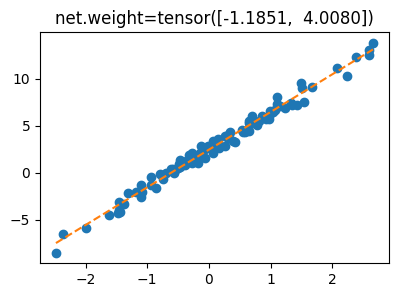

In [74]:
plt.plot(x,y,'o')
plt.plot(x,yhat.data,'--')
plt.title(f'net.weight={net.weight.data.reshape(-1)}');

`-` 나쁘지 않은 이유?

In [76]:
net.weight

In [77]:
net.bias